Data PreProcessing - MIMIC-III
-----
We sourced some already aggregated data from Kaggle: https://www.kaggle.com/code/drscarlat/predict-hospital-mortality-mimic3

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [5]:
data = pd.read_csv('/mimic3c.csv')

In [6]:
print(data.head())

   hadm_id gender  age  LOSdays admit_type             admit_location  \
0   100001      F   35     6.17  EMERGENCY  CLINIC REFERRAL/PREMATURE   
1   100003      M   59     4.04  EMERGENCY       EMERGENCY ROOM ADMIT   
2   100006      F   48    12.04  EMERGENCY       EMERGENCY ROOM ADMIT   
3   100007      F   73     7.29  EMERGENCY       EMERGENCY ROOM ADMIT   
4   100009      M   60     4.88  EMERGENCY  TRANSFER FROM HOSP/EXTRAM   

            AdmitDiagnosis insurance           religion marital_status  ...  \
0    DIABETIC KETOACIDOSIS   Private  PROTESTANT QUAKER       DIVORCED  ...   
1           UPPER GI BLEED   Private      NOT SPECIFIED         SINGLE  ...   
2               COPD FLARE   Private      NOT SPECIFIED         SINGLE  ...   
3        BOWEL OBSTRUCTION   Private             JEWISH        MARRIED  ...   
4  CORONARY ARTERY DISEASE   Private           CATHOLIC        MARRIED  ...   

  NumMicroLabs  NumNotes  NumOutput  NumRx NumProcEvents  NumTransfers  \
0         0.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hadm_id           58976 non-null  int64  
 1   gender            58976 non-null  object 
 2   age               58976 non-null  int64  
 3   LOSdays           58976 non-null  float64
 4   admit_type        58976 non-null  object 
 5   admit_location    58976 non-null  object 
 6   AdmitDiagnosis    58951 non-null  object 
 7   insurance         58976 non-null  object 
 8   religion          58518 non-null  object 
 9   marital_status    48848 non-null  object 
 10  ethnicity         58976 non-null  object 
 11  NumCallouts       58976 non-null  float64
 12  NumDiagnosis      58976 non-null  float64
 13  NumProcs          58976 non-null  float64
 14  AdmitProcedure    58976 non-null  object 
 15  NumCPTevents      58976 non-null  float64
 16  NumInput          58976 non-null  float6

In [8]:
data.describe()

,hadm_id,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,58976.000000,58976.000000,58976.000000,58976.000000,58976.00000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,149970.809584,53.005884,10.114955,0.099374,2.67596,0.785599,1.074118,30.379017,46.421124,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,0.099261,636.115579,2.360248
std,28883.095213,26.028120,12.456231,0.163437,8.26559,3.558090,2.027148,62.430163,76.061561,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,0.299014,783.938087,1.130337
min,100001.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,124952.750000,43.000000,3.710000,0.000000,0.82000,0.210000,0.000000,4.850000,26.980000,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,0.000000,267.407500,1.000000
50%,149989.500000,59.000000,6.460000,0.000000,1.41000,0.420000,0.970000,13.990000,38.520000,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,0.000000,497.335000,2.000000
75%,174966.500000,73.000000,11.790000,0.160000,2.40000,0.710000,1.560000,34.360000,50.860000,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,0.000000,811.382500,3.000000
max,199999.000000,89.000000,294.630000,4.760000,450.00000,275.000000,225.000000,6825.000000,5175.000000,375.000000,7500.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,1.000000,68600.000000,4.000000


array([[<Axes: title={'center': 'hadm_id'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'LOSdays'}>,
        <Axes: title={'center': 'NumCallouts'}>],
       [<Axes: title={'center': 'NumDiagnosis'}>,
        <Axes: title={'center': 'NumProcs'}>,
        <Axes: title={'center': 'NumCPTevents'}>,
        <Axes: title={'center': 'NumInput'}>],
       [<Axes: title={'center': 'NumLabs'}>,
        <Axes: title={'center': 'NumMicroLabs'}>,
        <Axes: title={'center': 'NumNotes'}>,
        <Axes: title={'center': 'NumOutput'}>],
       [<Axes: title={'center': 'NumRx'}>,
        <Axes: title={'center': 'NumProcEvents'}>,
        <Axes: title={'center': 'NumTransfers'}>,
        <Axes: title={'center': 'NumChartEvents'}>],
       [<Axes: title={'center': 'ExpiredHospital'}>,
        <Axes: title={'center': 'TotalNumInteract'}>,
        <Axes: title={'center': 'LOSgroupNum'}>, <Axes: >]], dtype=object)

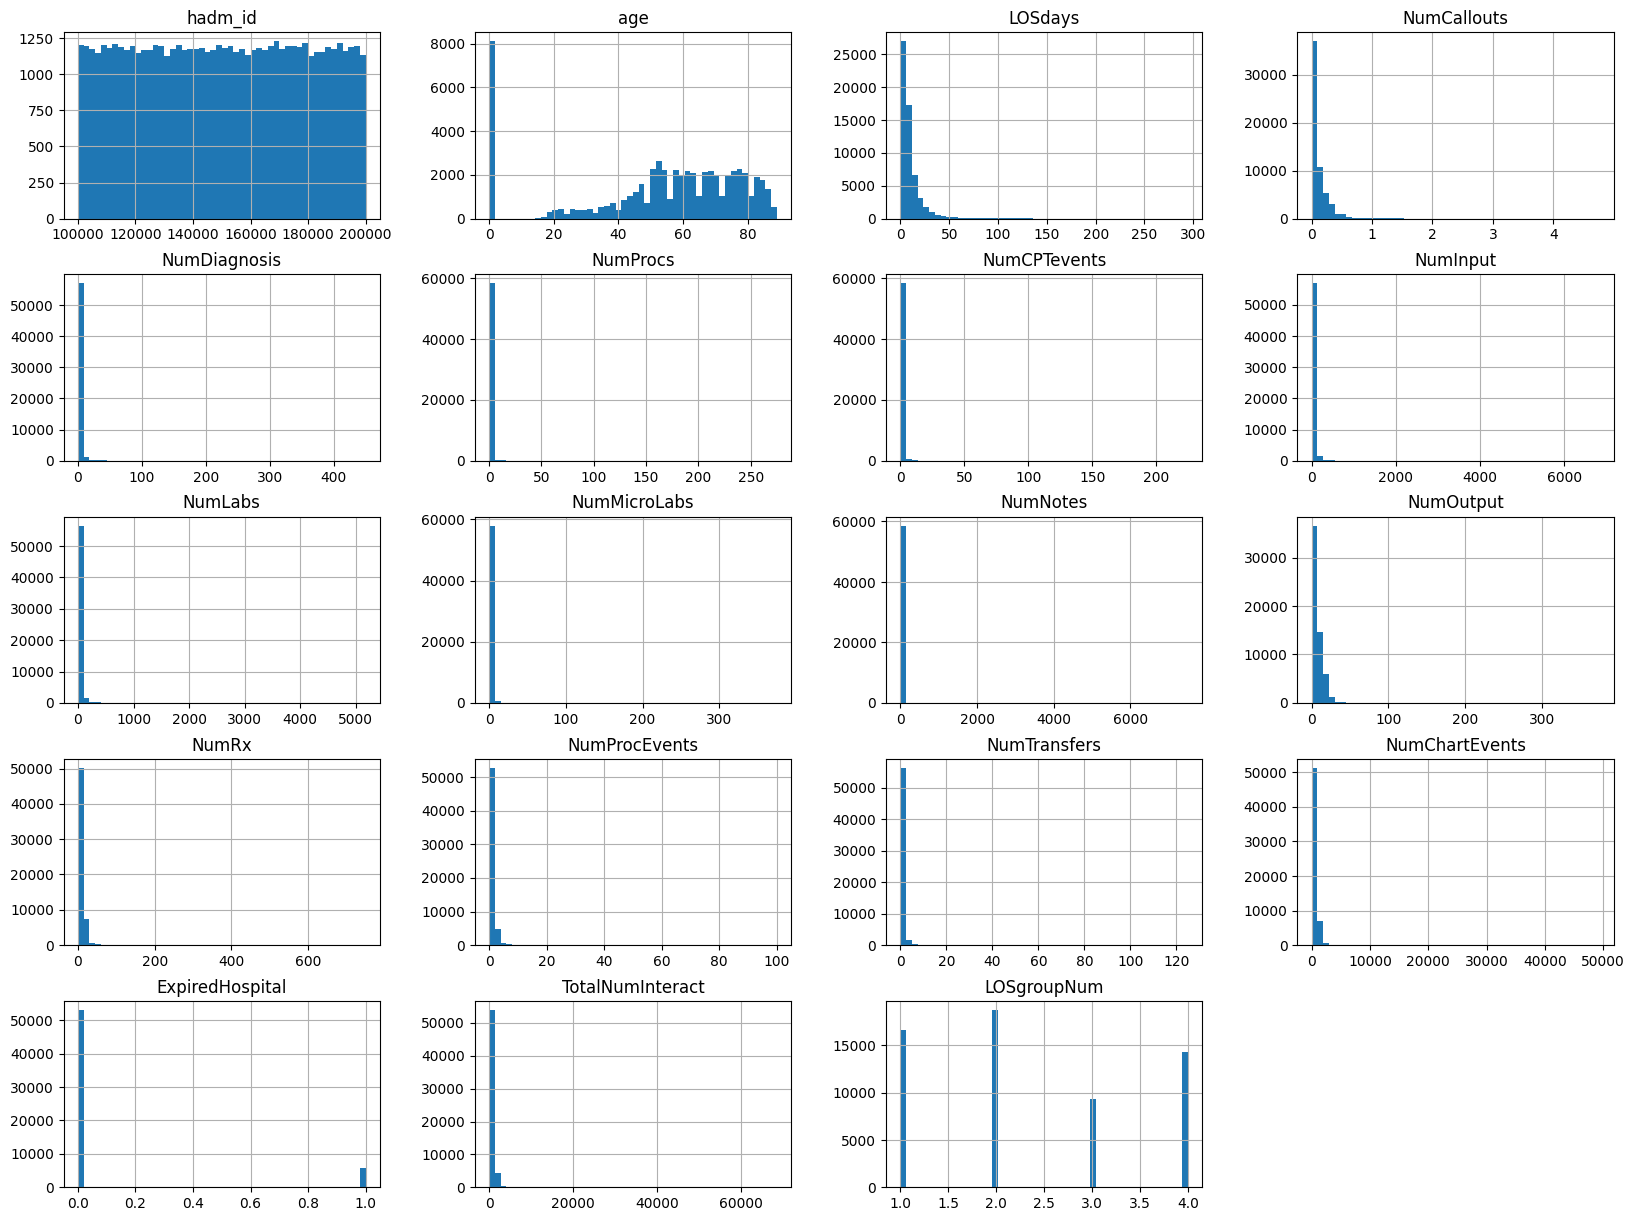

In [9]:
data.hist(bins = 50, figsize=(20,15))

In [10]:
Y = data['ExpiredHospital']
X = data.drop(columns=['ExpiredHospital'])


In [11]:
X = X.drop(columns =['LOSdays'])
X = X.drop(columns =['LOSgroupNum'])
X = X.drop(columns =['AdmitDiagnosis'])
X = X.drop(columns =['AdmitProcedure'])
X = X.drop(columns =['marital_status'])
X = X.drop(columns =['ethnicity'])
X = X.drop(columns =['religion'])
X = X.drop(columns =['insurance'])
X.head()

,hadm_id,gender,age,admit_type,admit_location,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,TotalNumInteract
0,100001,F,35,EMERGENCY,CLINIC REFERRAL/PREMATURE,0.16,2.59,0.00,1.30,25.12,43.44,0.65,0.05,5.19,14.91,1.13,0.65,398.70,493.89
1,100003,M,59,EMERGENCY,EMERGENCY ROOM ADMIT,0.25,2.23,0.99,1.98,13.61,55.94,1.24,1.59,5.45,7.18,0.99,1.24,373.02,465.71
2,100006,F,48,EMERGENCY,EMERGENCY ROOM ADMIT,0.00,0.75,0.17,0.83,11.46,33.39,0.33,0.15,4.15,6.23,0.00,0.33,286.21,344.00
3,100007,F,73,EMERGENCY,EMERGENCY ROOM ADMIT,0.41,0.69,0.27,0.69,20.30,32.24,0.69,0.17,9.05,11.52,0.00,0.96,526.06,603.05
4,100009,M,60,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,0.00,3.69,0.82,2.25,20.49,50.61,0.61,0.34,16.19,25.00,2.87,2.05,554.92,679.84


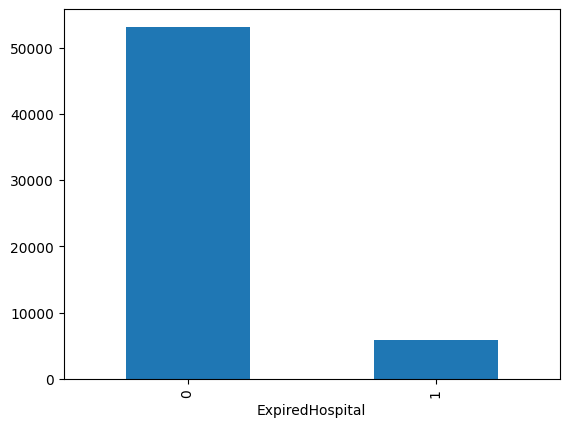

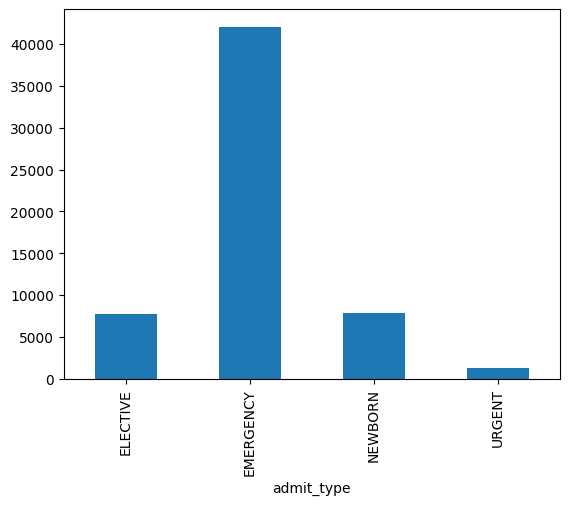

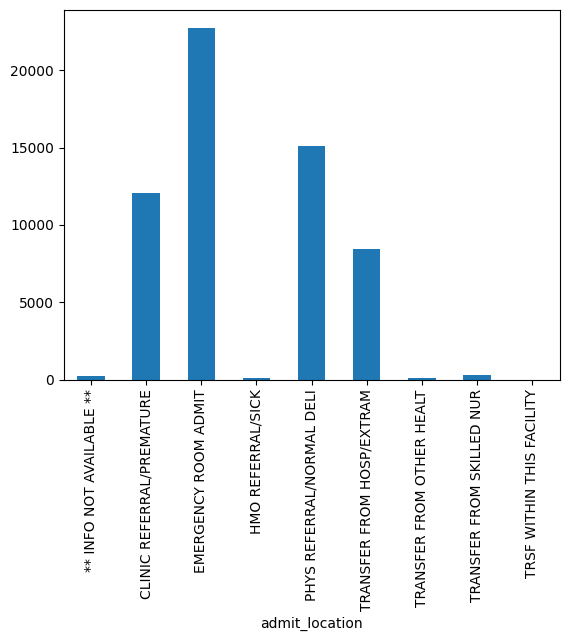

In [12]:
data.groupby('ExpiredHospital').size().plot.bar()
plt.show()
data.groupby('admit_type').size().plot.bar()
plt.show()
data.groupby('admit_location').size().plot.bar()
plt.show()

In [13]:
print(X.shape)
categorical_columns = [
                    'gender',
                    'admit_type',
                    'admit_location'
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')

print(X.shape)

(58976, 19)
(58976, 31)


In [14]:
#normalize
X_unnormalized = X.copy()
Y_unnormalized = Y.copy()

x = X_unnormalized.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled, columns=X_unnormalized.columns)
print(X)


        hadm_id       age  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  \
0     -1.730086 -0.691792     0.370949     -0.010400 -0.220794      0.111429   
1     -1.730017  0.230296     0.921627     -0.053954  0.057447      0.446879   
2     -1.729913 -0.192328    -0.608032     -0.233011 -0.173015     -0.120425   
3     -1.729878  0.768180     1.900608     -0.240270 -0.144910     -0.189488   
4     -1.729809  0.268716    -0.608032      0.122683  0.009668      0.580072   
...         ...       ...          ...           ...       ...           ...   
58971  1.731899  0.268716    -0.608032     -0.278985 -0.071837     -0.066161   
58972  1.731934  0.191876    -0.608032     -0.212444 -0.105563     -0.224020   
58973  1.731969 -1.152835    -0.608032     -0.251159 -0.069026     -0.500273   
58974  1.732072  0.614499    -0.608032      0.005328 -0.077458     -0.446009   
58975  1.732107  1.344485    -0.608032     -0.038226 -0.170205      0.096630   

       NumInput   NumLabs  NumMicroLabs

FedAVG with MLP
-----
I switched to a multi layer perceptron model here, as there was no straightforward way to aggregate the decision trees in XGBoost, again I can very quickly fine tune the MLP implementation later, for now I'm keeping it to a simple ICU mortality prediction problem


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD



In [16]:
def create_model(input_dim, output_dim):
  model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(256, activation='relu'),
    Dense(1, activation='tanh')
  ])

  model.compile(optimizer= SGD(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

  return model

In [17]:
from sklearn.model_selection import train_test_split
X_Test, X_Train, Y_Test, Y_Train = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
num_clients = 10


In [19]:
X_train_chunks = np.array_split(X_Train, num_clients)
Y_train_chunks = np.array_split(Y_Train, num_clients)

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [20]:
def FedLAMA(X_train_chunks, Y_train_chunks, num_clients, base_agg_intr, global_rounds, mini_batch_size, interval_increase_factor):
    ############################
    ###  ALGO 1 FROM PAPER  ####
    ############################

    #init the global model.
    global_model = create_model(X_train_chunks[0].shape[1], 1)

    #init client models
    client_models = [create_model(X_train_chunks[0].shape[1], 1) for _ in range(num_clients)]
    for model in client_models:
        #set client weights to the global model weights.
        model.set_weights(global_model.get_weights())
        #complire w/ SGD
        model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    #init the aggregation interval for each weight array
    agg_intr_by_layer = [base_agg_intr] * len(global_model.get_weights())

    #initial global weights
    global_weights = global_model.get_weights()

    #global training loop
    for round in range(global_rounds):
        print("Global Round:", round)

        #local iterations = maximum aggregation interval
        tau_max = max(agg_intr_by_layer)
        num_local_iters = tau_max

        discrepancy_by_layer = [0] * len(global_model.get_weights())

        #for each client model
        for i in range(num_local_iters):
            print("Local Iteration:", i)

            #update each model once
            for client in range(num_clients):
                #select minibatch
                mini_batch_indices = np.random.choice(len(X_train_chunks[client]), mini_batch_size, replace=False)
                X_mini_batch = X_train_chunks[client].iloc[mini_batch_indices]
                Y_mini_batch = Y_train_chunks[client].iloc[mini_batch_indices]

                #single sgd update on client
                client_models[client].train_on_batch(X_mini_batch, Y_mini_batch)

            #iterate thru each layer, decide if need to sync
            for l in range(len(global_model.get_weights())):
                # Check if layer l should be synchronized on this local iteration.
                if i % agg_intr_by_layer[l] == 0:
                    #averaging client weights and discrepancies
                    global_aggregated_weights = np.zeros_like(global_weights[l])
                    layer_discrepancy = 0
                    for client in range(num_clients):
                        client_weight = client_models[client].get_weights()[l]
                        global_aggregated_weights += client_weight
                        #squared difference btwn current global weight and client weight
                        layer_discrepancy += np.sum((global_weights[l] - client_weight) ** 2)

                    #avg weight and normalize the discrepancy
                    global_aggregated_weights /= num_clients
                    #np.prod to get total number of parameters in this weight array
                    layer_discrepancy /= (num_clients * np.prod(global_weights[l].shape) * agg_intr_by_layer[l])

                    # Save the computed discrepancy for layer l
                    discrepancy_by_layer[l] = layer_discrepancy

                    # Update global weights for layer l
                    global_weights[l] = global_aggregated_weights

                    #update client with the entire global model weights
                    for client in range(num_clients):
                        client_models[client].set_weights(global_weights)

                    for model in client_models:
                         model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
        #end local iterations loop

        #global model update
        global_model.set_weights(global_weights)

        #########
        # Algorithm 2: Adaptive Aggregation Interval Adjustment
        #########

        if round % (interval_increase_factor * base_agg_intr) == 0:
            #find total discrepancy and total params
            total_discrepancy = 0
            total_params = 0
            for l in range(len(global_model.get_weights())):
                total_discrepancy += discrepancy_by_layer[l] * np.prod(global_weights[l].shape)
                total_params += np.prod(global_weights[l].shape)

            #sorted list of indices for layers based on discrepancy
            sorted_indices = sorted(range(len(discrepancy_by_layer)), key=lambda i: discrepancy_by_layer[i])

            #itr thru layers sorted by discrepancy
            for K in range(1, len(sorted_indices) + 1):
                cum_discrepancy = 0
                cum_params = 0
                for k in range(K):
                    idx = sorted_indices[k]
                    cum_discrepancy += discrepancy_by_layer[idx] * np.prod(global_weights[idx].shape)
                    cum_params += np.prod(global_weights[idx].shape)
                #ratios
                delta_k = cum_discrepancy / total_discrepancy
                lambda_k = cum_params / total_params

                #adjust aggregation interval for layer at k
                if delta_k < (1 - lambda_k):#high discrepany to param ratio
                    #increase agg intr
                    agg_intr_by_layer[sorted_indices[K-1]] *= interval_increase_factor
                else:
                    #else set to base interval
                    agg_intr_by_layer[sorted_indices[K-1]] = base_agg_intr
        #end global loop

    return global_model, client_models

In [21]:
global_model, client_models = FedLAMA(X_train_chunks, Y_train_chunks, num_clients, base_agg_intr=10, global_rounds=25, mini_batch_size=32, interval_increase_factor=2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Global Round: 0
Local Iteration: 0


Local Iteration: 1
Local Iteration: 2
Local Iteration: 3
Local Iteration: 4
Local Iteration: 5
Local Iteration: 6
Local Iteration: 7
Local Iteration: 8
Local Iteration: 9
Global Round: 1
Local Iteration: 0
Local Iteration: 1
Local Iteration: 2
Local Iteration: 3
Local Iteration: 4
Local Iteration: 5
Local Iteration: 6
Local Iteration: 7
Local Iteration: 8
Local Iteration: 9
Local Iteration: 10
Local Iteration: 11
Local Iteration: 12
Local Iteration: 13
Local Iteration: 14
Local Iteration: 15
Local Iteration: 16
Local Iteration: 17
Local Iteration: 18
Local Iteration: 19
Global Round: 2
Local Iteration: 0
Local Iteration: 1
Local Iteration: 2
Local Iteration: 3
Local Iteration: 4
Local Iteration: 5
Local Iteration: 6
Local Iteration: 7
Local Iteration: 8
Local Iteration: 9
Local Iteration: 10
Local Iteration: 11
Local Iteration: 12
Local Iteration: 13
Local Iteration: 14
Local Iteration: 15
Local Iteration: 16
Local Iteration: 17
Local Iteration: 18
Local Iteration: 19
Global Round: 3
L

In [22]:
predictions = global_model.predict(X_Test)

1475/1475 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [24]:

global_model.evaluate(X_Test, Y_Test)

1475/1475 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9157 - loss: 0.3160


[0.3126297891139984, 0.9159177541732788]

In [25]:
def f1_score(y_true, y_pred):
    y_true = y_true.to_numpy().flatten()
    TP = 0
    FP = 0
    FN = 0
    for i in range(len(y_pred)):
        if y_pred[i] >= 0.5:
            y_pred[i] = 1
        else:
            y_pred[i] = 0

        if y_pred[i] == 1 and y_true[i] == 1:
            TP += 1
        elif y_pred[i] == 1 and y_true[i] == 0:
            FP += 1
        elif y_pred[i] == 0 and y_true[i] == 1:
            FN += 1


    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    score = 2 * (precision * recall) / (precision + recall)
    return score

In [26]:
print("F1 score:", f1_score(Y_Test, predictions))

F1 score: 0.5345535609527161
